### From: https://github.com/AURIN-OFFICE/training/blob/main/Explore/Python/ADP.ipynb

In [4]:
!pip install owslib geopandas folium
from owslib.wfs import WebFeatureService
import geopandas
import folium
import io

Defaulting to user installation because normal site-packages is not writeable


In [5]:
WFS_USERNAME = ''
WFS_PASSWORD= ''
WFS_URL='https://adp.aurin.org.au/geoserver/wfs'

In [6]:
adp_client = WebFeatureService(url=WFS_URL,username=WFS_USERNAME, password=WFS_PASSWORD, version='2.0.0')

In [7]:
# (Optional) Check what operations are available
[operation.name for operation in adp_client.operations]

['GetCapabilities',
 'DescribeFeatureType',
 'GetFeature',
 'GetPropertyValue',
 'ListStoredQueries',
 'DescribeStoredQueries',
 'CreateStoredQuery',
 'DropStoredQuery',
 'LockFeature',
 'GetFeatureWithLock',
 'Transaction',
 'ImplementsBasicWFS',
 'ImplementsTransactionalWFS',
 'ImplementsLockingWFS',
 'KVPEncoding',
 'XMLEncoding',
 'SOAPEncoding',
 'ImplementsInheritance',
 'ImplementsRemoteResolve',
 'ImplementsResultPaging',
 'ImplementsStandardJoins',
 'ImplementsSpatialJoins',
 'ImplementsTemporalJoins',
 'ImplementsFeatureVersioning',
 'ManageStoredQueries',
 'PagingIsTransactionSafe',
 'QueryExpressions']

### We can view information about the dataset name and title of the first 10 datasets:

In [8]:
contents = list(adp_client.contents)
contents[:1000000]

['datasource-NSW_Govt_DPE-UoM_AURIN_DB:nsw_srlup_additional_rural_2014',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:aus_2016_aust',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:gccsa_2011_aust',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:gccsa_2016_aust',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2016_aust',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_act',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_nsw',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_nt',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_ot',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_qld',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_sa',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_tas',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_vic',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_wa',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:ste_2011_aust',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:ste_2016_aust',
 

In [9]:
contents = list(adp_client.contents)
for x in contents:
    if 'school' in x.lower():
        print(x)

datasource-AU_Govt_ABS_Census-UoM_AURIN_DB_Census1981:c15_age_left_school_cd_1981
datasource-AU_Govt_ABS_Census-UoM_AURIN_DB_Census1981:c15_age_left_school_lga_1981
datasource-AU_Govt_ABS_Census-UoM_AURIN_DB_Census1986:u14_age_left_school_sla_1986
datasource-AU_Govt_ABS_Census-UoM_AURIN_DB_Census1986:u21_age_left_school_lga_1986
datasource-AU_Govt_ABS_Census-UoM_AURIN_DB_2:gccsa_i06_highest_yr_hschool_by_i_status_by_sex_census_2016
datasource-NSW_Govt_DE-UoM_AURIN_DB:nsw_govt_school_catchments_2017
datasource-NSW_Govt_DE-UoM_AURIN_DB:nsw_govt_school_fte_2010_2016
datasource-AU_Govt_ABS_Census-UoM_AURIN_DB_2:lga_i06_highest_yr_hschool_by_i_status_by_sex_census_2016
datasource-NSW_Govt_DE-UoM_AURIN_DB:nsw_govt_school_master_dataset_201712
datasource-NSW_Govt_DE-UoM_AURIN_DB:nsw_govt_school_master_dataset_201901
datasource-NSW_Govt_DE-UoM_AURIN_DB:nsw_nongovernment_school_locations_2016
datasource-QLD_Govt_QED-UoM_AURIN_DB:qld_qed_state_school_by_lote_point_2017
datasource-QLD_Govt_QED-Uo

### To download that dataset into Python, find and copy its ADP ID from the metadata table, in this case, it is datasource-VIC_Govt_DELWP-VIC_Govt_DELWP:datavic_VMFEAT_CFA_FIRE_STATION. Then create the following query, pasting the ADP ID into the type name variable. The GetFeature() operation returns a selection of features from the data source. Then we save it to the variable called response.

In [10]:
response = adp_client.getfeature(typename='datasource-VIC_Govt_DET-UoM_AURIN_DB:vic_school_locations_2019')

### Next, save the variable response to a file named data_fire.gml. This file is in gml format. If you'd like to download the dataset, please store it in a safe and secure environment.

In [11]:
out = open('data_fire.gml', 'wb')
out.write(response.read())
out.close()

### After downloading the information, we can use the function geopandas.read_file to load the data in a DataFrame.

### Use the head() function to see fire stations on a map as individual point locations:

### Now you will see information about the fire stations in tabular format:

In [12]:
data_fire = geopandas.read_file('data_fire.gml')
data_fire.head()

,gml_id,ogc_fid,education_sector,entity_type,school_no,school_name,school_type,school_status,_address_line_1,_address_line_2,...,_postal_address_line_2,postal_town,postal_state,postal_postcode,full_phone_no,lga_id,lga_name,x,y,geometry
0,vic_school_locations_2019.1,1,Government,1,1,Alberton Primary School,Primary,O,21 Thomson Street,None,...,None,ALBERTON,VIC,3971,03 5183 2412,681,Wellington (S),146.666601,-38.617713,MULTIPOINT (146.6666 -38.61771)
1,vic_school_locations_2019.2,2,Government,1,3,Allansford and District Primary School,Primary,O,Frank Street,None,...,None,ALLANSFORD,VIC,3277,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281,MULTIPOINT (142.59039 -38.38628)
2,vic_school_locations_2019.3,3,Government,1,4,Avoca Primary School,Primary,O,118 Barnett Street,None,...,None,AVOCA,VIC,3467,03 5465 3176,599,Pyrenees (S),143.475649,-37.084502,MULTIPOINT (143.47565 -37.0845)
3,vic_school_locations_2019.4,4,Government,1,8,Avenel Primary School,Primary,O,40 Anderson Street,None,...,None,AVENEL,VIC,3664,03 5796 2264,643,Strathbogie (S),145.234722,-36.901368,MULTIPOINT (145.23472 -36.90137)
4,vic_school_locations_2019.5,5,Government,1,12,Warrandyte Primary School,Primary,O,5-11 Forbes Street,None,...,None,WARRANDYTE,VIC,3113,03 9844 3537,421,Manningham (C),145.213980,-37.742675,MULTIPOINT (145.21398 -37.74268)


### You can now visualise the fire stations on a map as individual point locations by using the plot() command.

<Axes: >

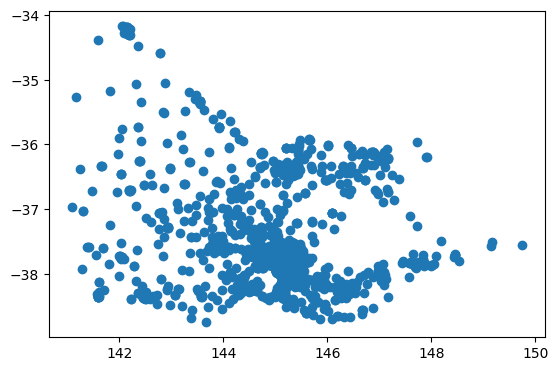

In [13]:
data_fire.plot()